# Denoising Autoencoder with PyTorch

Adapted from: https://github.com/Atcold/pytorch-Deep-Learning/blob/master/10-autoencoder.ipynb

In [19]:
# !pip install torch torchvision opencv-python

     |████████████████████████████████| 46.3 MB 27.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/haeunoh/.pyenv/versions/3.8.12/envs/link-env/bin/python3.8 -m pip install --upgrade pip' command.


In [13]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [14]:
from matplotlib import pyplot as plt


def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1, 4, i + 1)
                plt.imshow(in_pic[i + 4 * N])
                plt.axis("off")
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1, 4, i + 1)
            plt.imshow(out_pic[i + 4 * N])
            plt.axis("off")

## Load MNIST data

In [8]:
from torchvision import transforms
from torchvision.datasets import MNIST

img_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

dataset = MNIST("./data", transform=img_transform, download=True)

9913344it [00:00, 42310664.36it/s]                                              


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



29696it [00:00, 14305047.84it/s]                                                


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



1649664it [00:00, 18305419.55it/s]                                              


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



5120it [00:00, 19037975.60it/s]                                                 


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Create dataloaders

In [9]:
from torch.utils.data import DataLoader

batch_size = 256

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

## Define model

In [22]:
from torch import nn

d = 30


class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## Create model

In [11]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()

## Train model

epoch [1/20], loss:0.2098
epoch [2/20], loss:0.1394
epoch [3/20], loss:0.1227
epoch [4/20], loss:0.1088
epoch [5/20], loss:0.0917
epoch [6/20], loss:0.0826
epoch [7/20], loss:0.0877
epoch [8/20], loss:0.0761
epoch [9/20], loss:0.0760
epoch [10/20], loss:0.0704
epoch [11/20], loss:0.0689


/var/folders/q4/tblcs1ln7qgc06qc7cbyg5yw0000gn/T/mrxlink-component-2aedsk2s/mrxlink_component_db988663.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(18, 6))


epoch [12/20], loss:0.0713
epoch [13/20], loss:0.0623
epoch [14/20], loss:0.0635
epoch [15/20], loss:0.0612
epoch [16/20], loss:0.0587
epoch [17/20], loss:0.0607
epoch [18/20], loss:0.0561
epoch [19/20], loss:0.0538
epoch [20/20], loss:0.0554


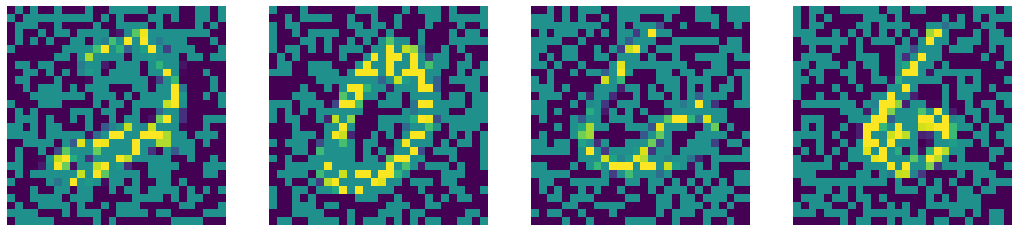

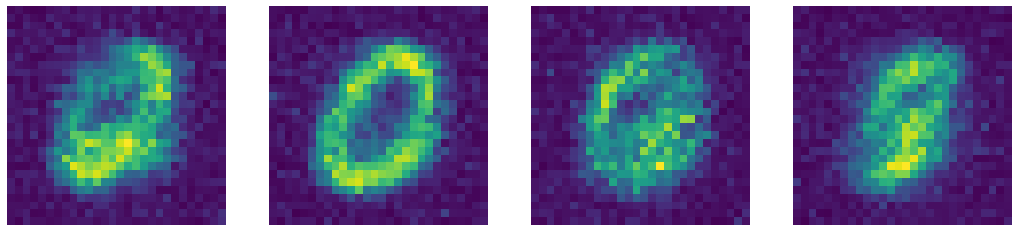

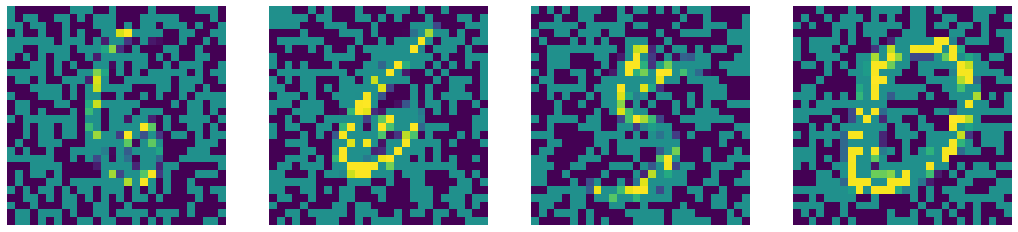

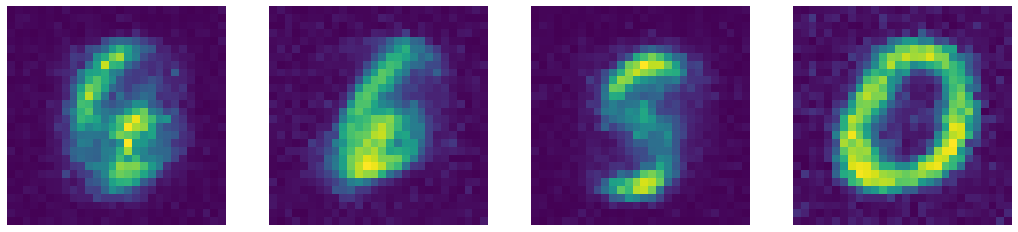

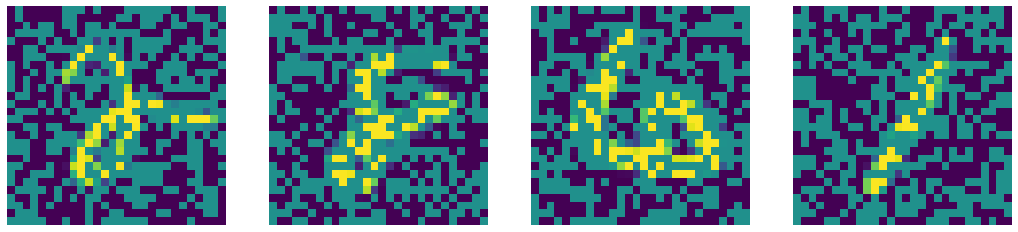

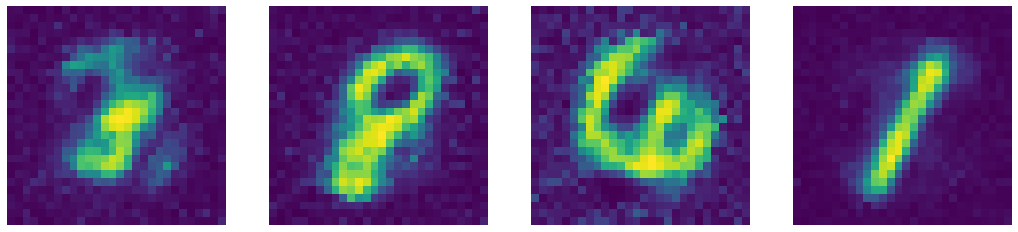

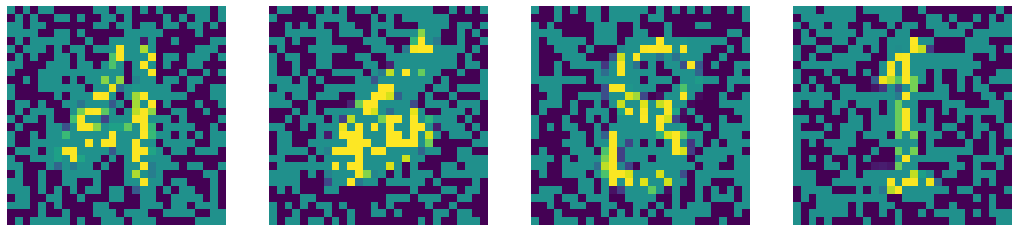

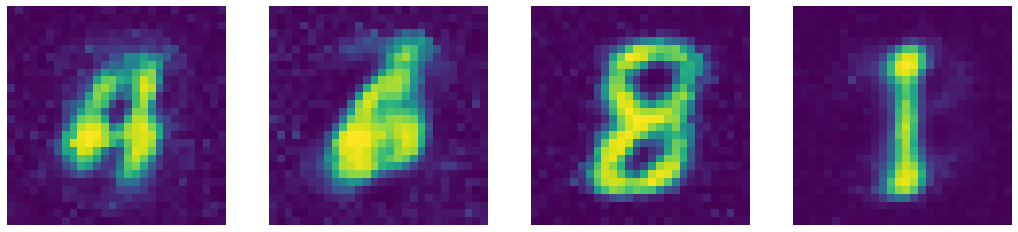

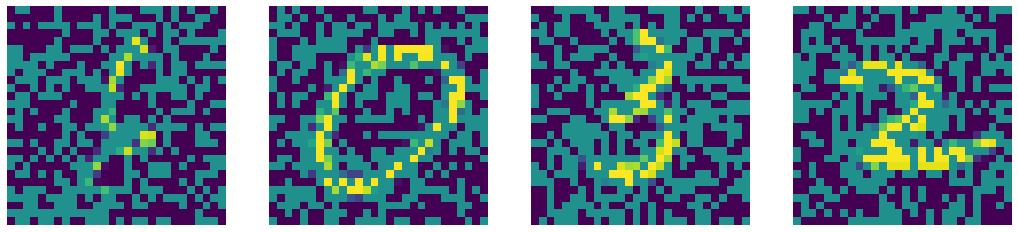

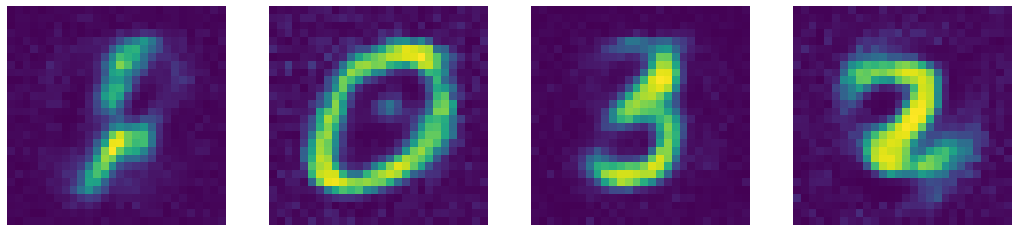

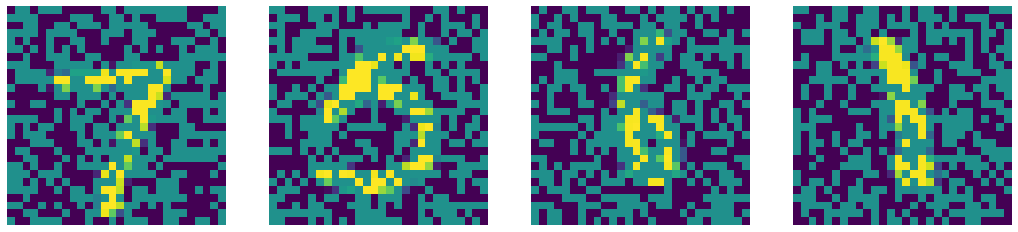

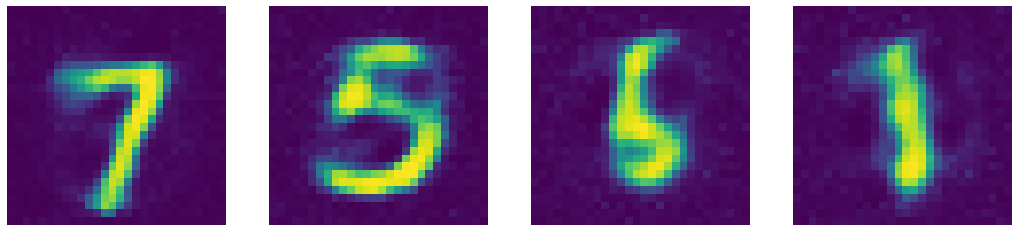

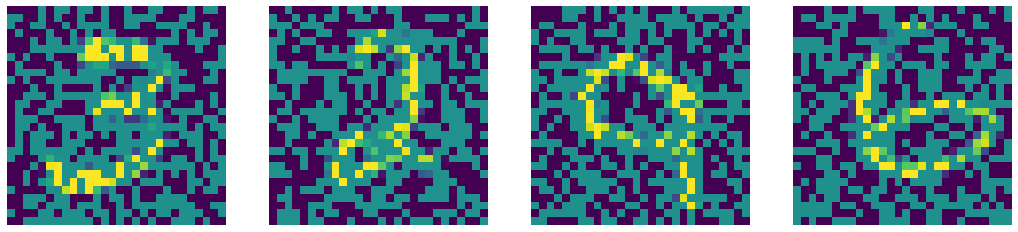

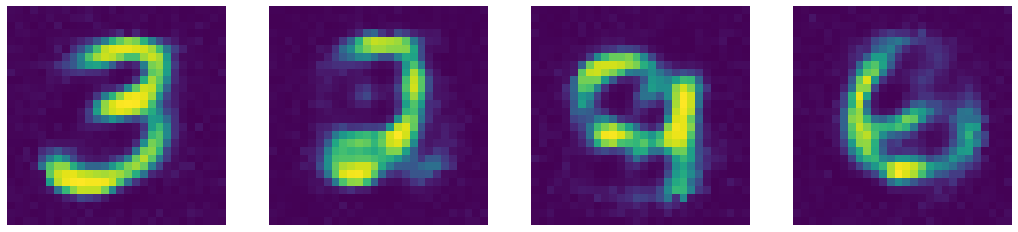

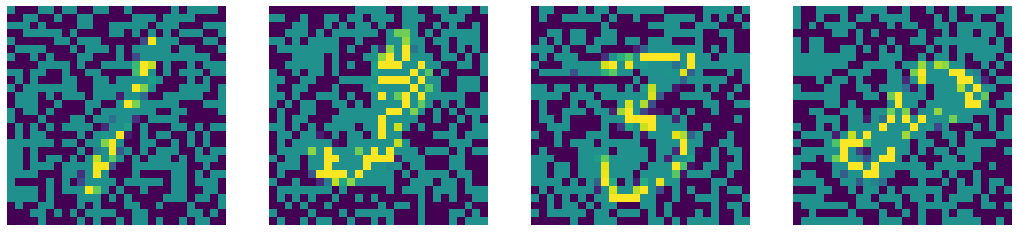

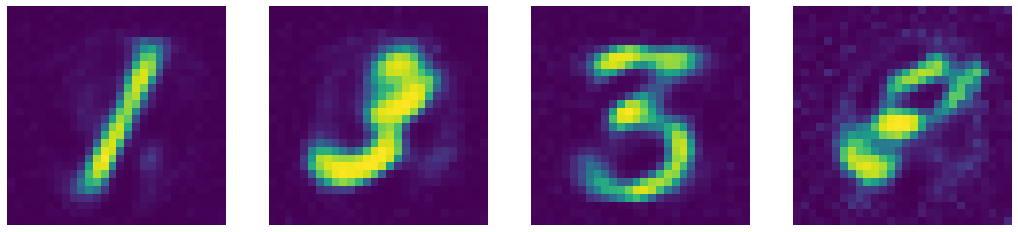

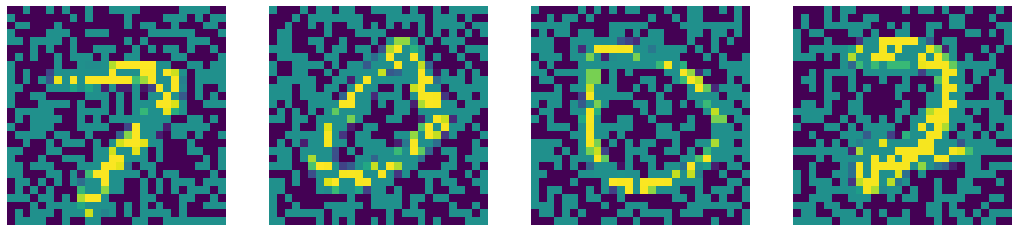

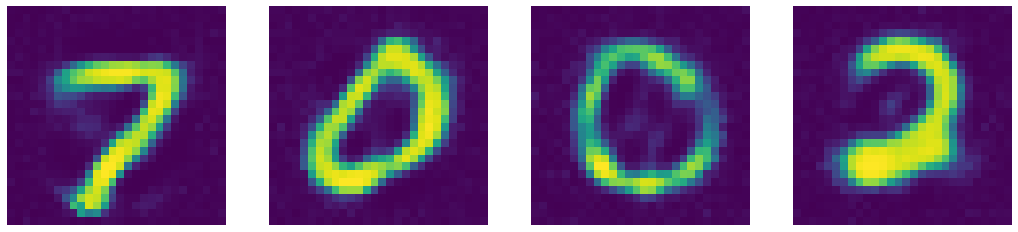

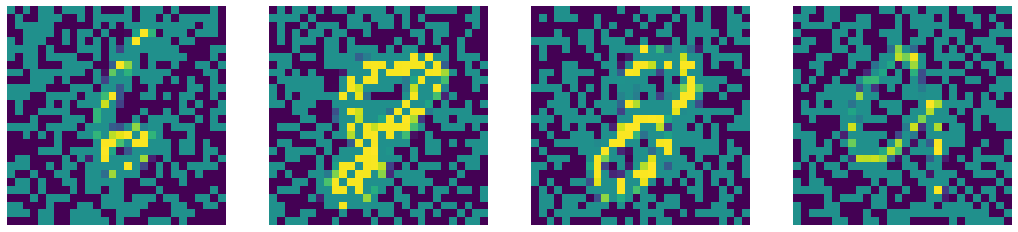

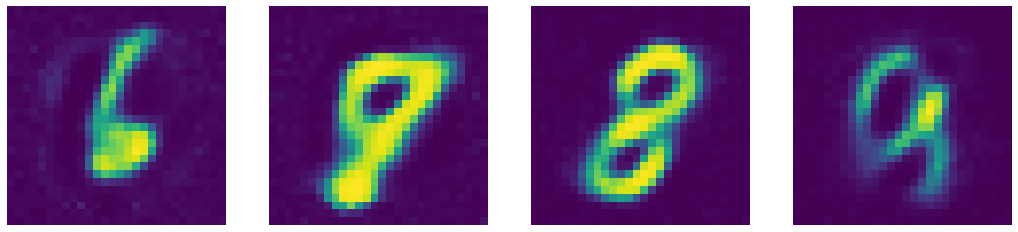

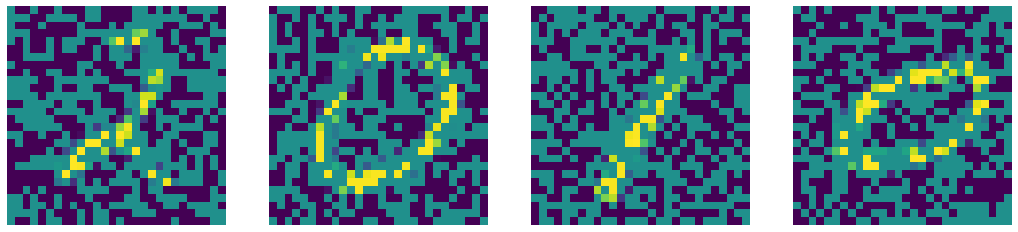

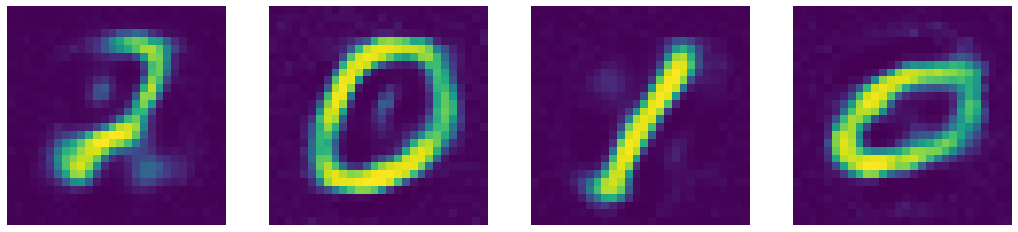

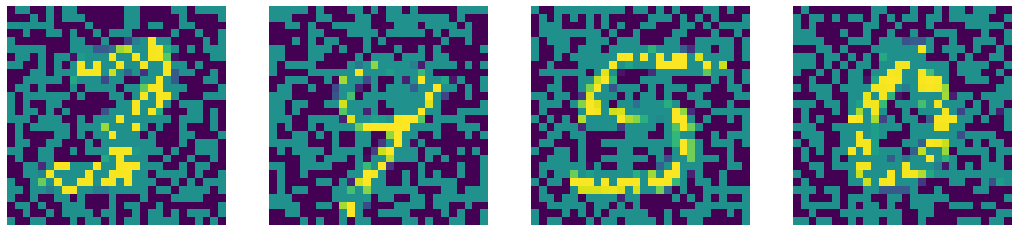

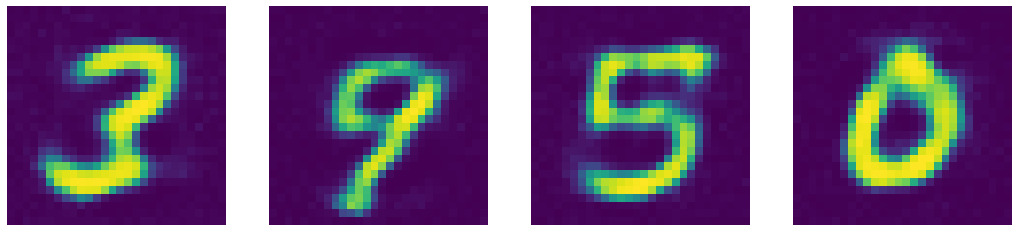

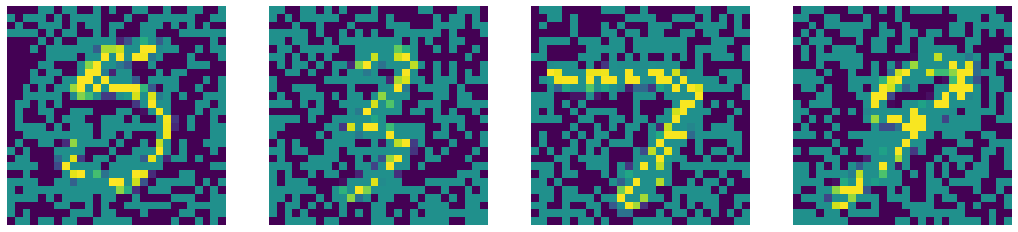

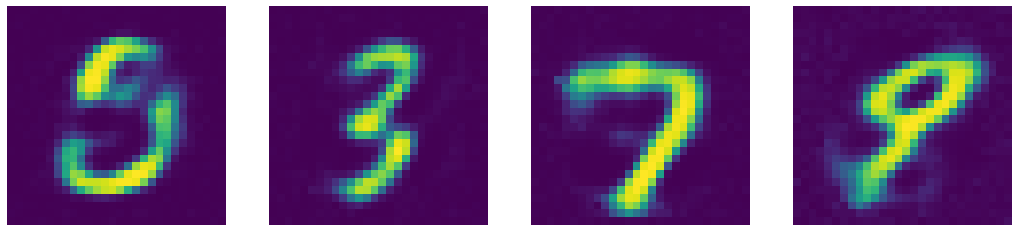

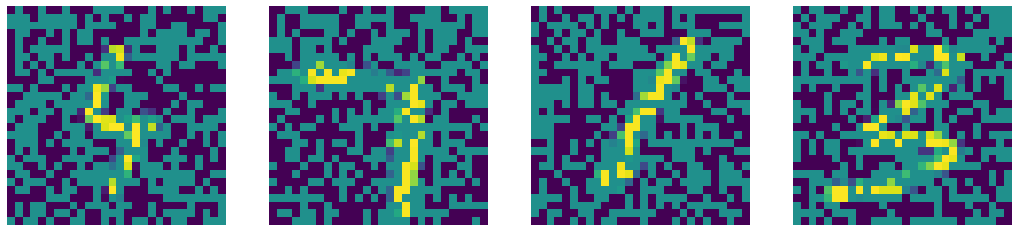

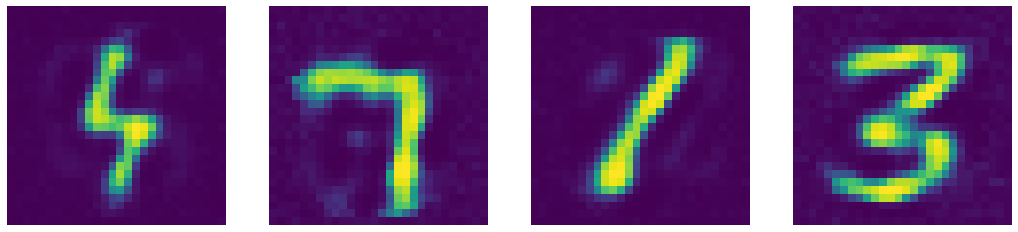

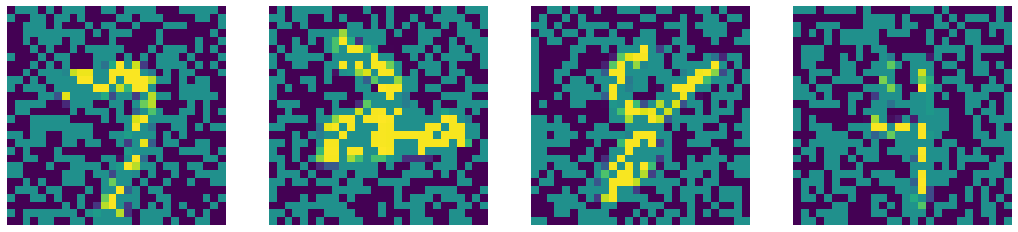

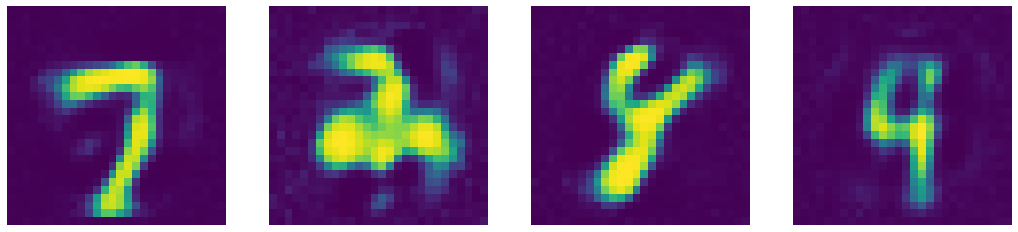

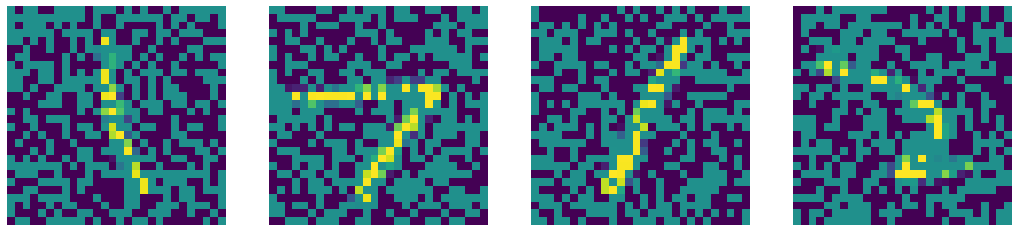

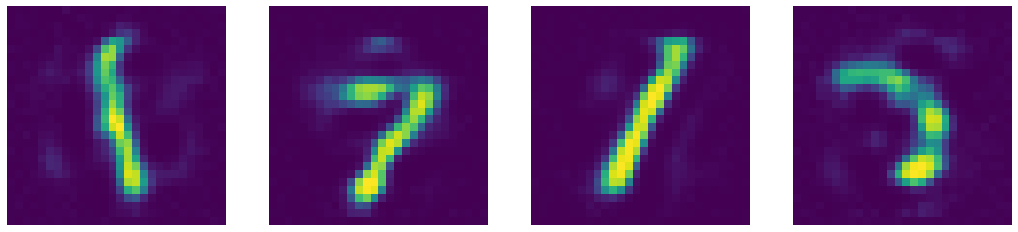

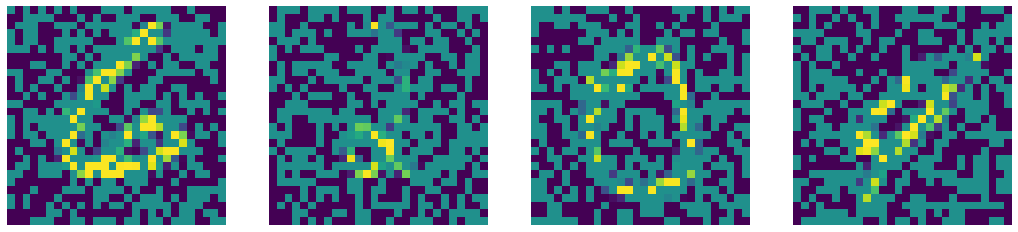

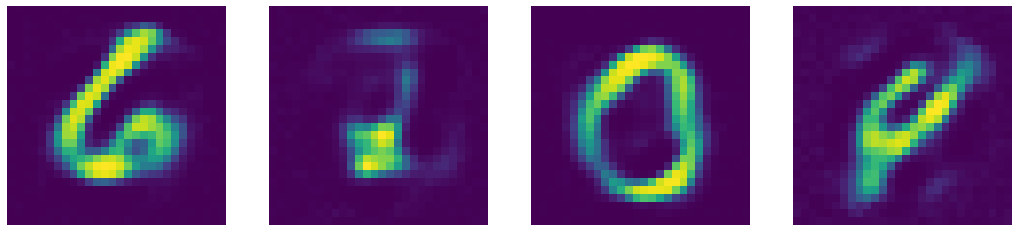

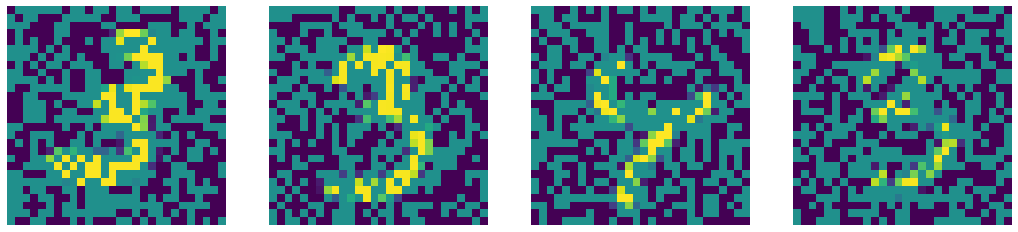

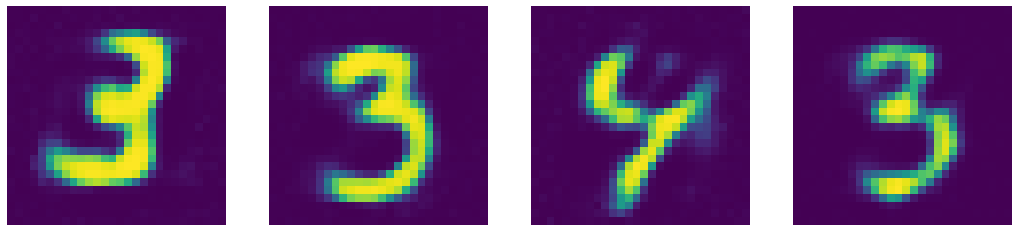

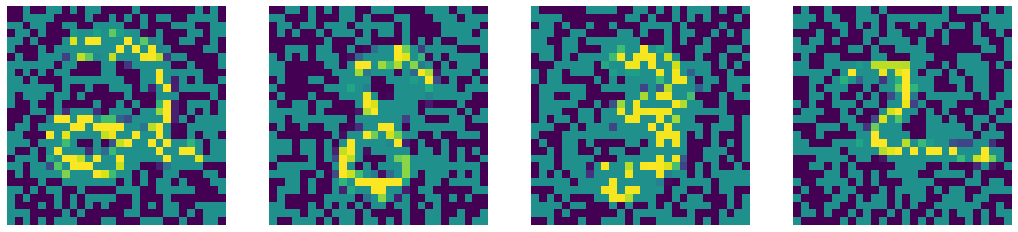

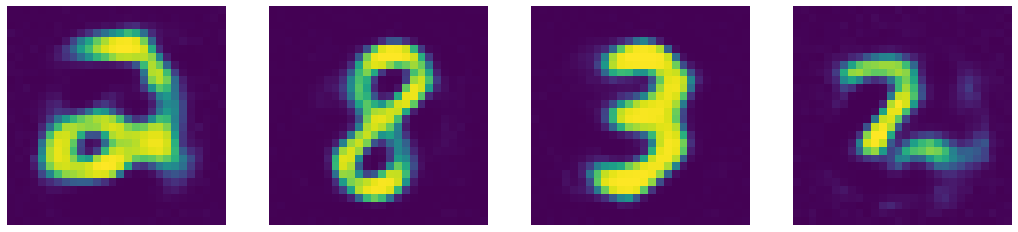

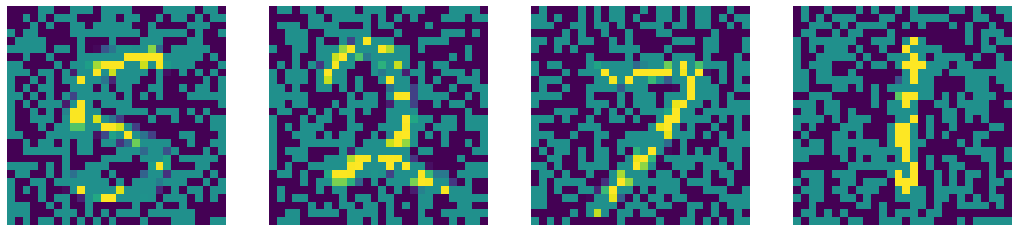

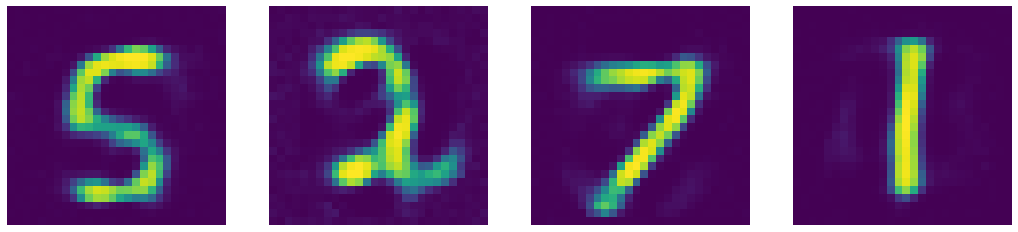

In [1]:
learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)
num_epochs = 20
do = nn.Dropout()
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        noise = do(torch.ones(img.shape)).to(device)
        img_bad = (img * noise).to(device)
        output = model(img)
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}")
    display_images(img_bad, output)